<a href="https://colab.research.google.com/github/abhilashs1/Fitness_Tracking_App_Analysis/blob/main/Fitness_Tracking_App_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fitness Tracking App Analysis**

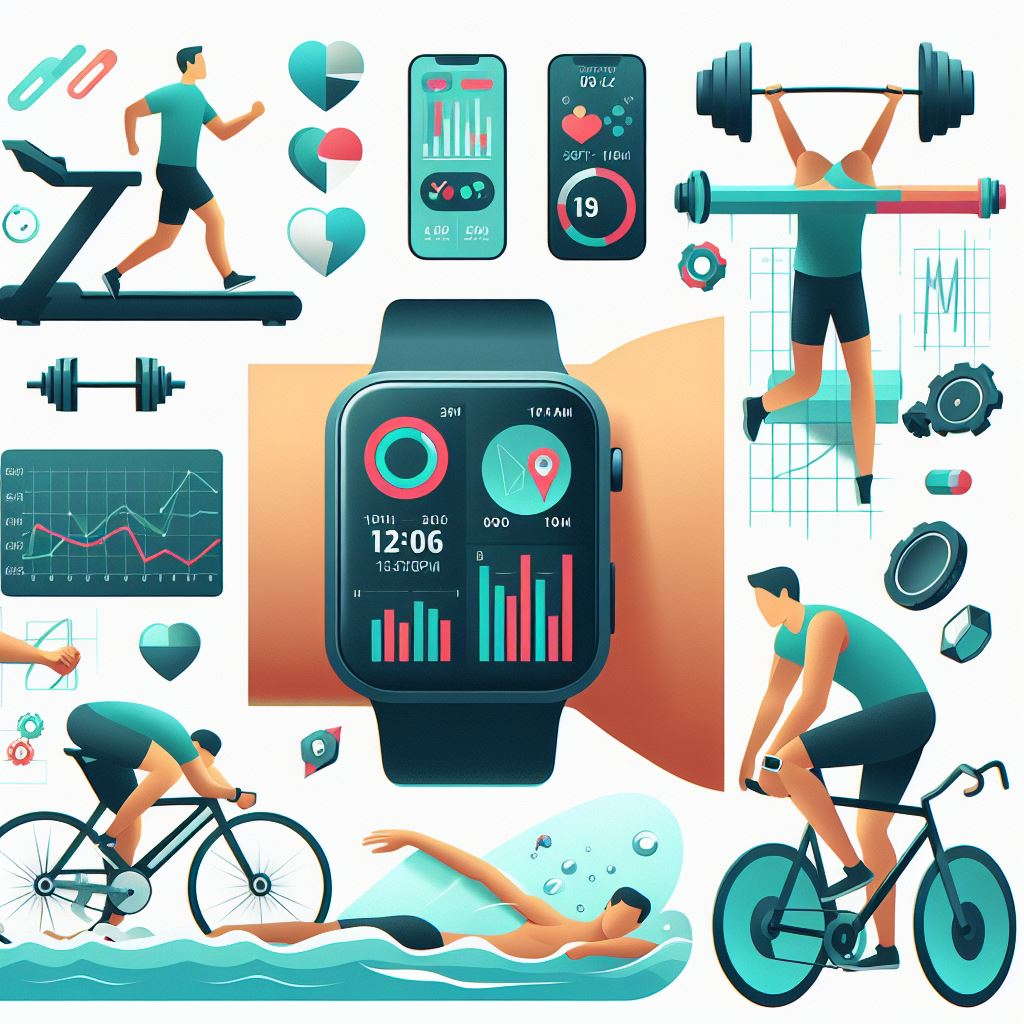

# **Data Loading**

In [42]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive/')

# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Assignment/A1Apps/A1Apps.xlsx')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Data Exploration**

In [43]:
# Display first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   user_id install_date last_activity_date  age  gender     location  \
0        1   2023-01-02         2023-01-11   27  Female        Spain   
1        2   2023-01-01         2023-01-12   39  Female     Portugal   
2        3   2023-01-01         2023-01-12   29  Female  Philippines   
3        4   2023-01-02         2023-01-06   25    Male        China   
4        5   2023-01-03         2023-01-08   32  Female  Philippines   

  activity_level  feature1_usage  feature2_usage  feature3_usage  
0            Low              27              30              12  
1           High              16              16              27  
2            Low              26              23              18  
3            Low               6              18              25  
4           High              17              18              14  


In [44]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1000 non-null   int64         
 1   install_date        1000 non-null   datetime64[ns]
 2   last_activity_date  1000 non-null   datetime64[ns]
 3   age                 1000 non-null   int64         
 4   gender              1000 non-null   object        
 5   location            1000 non-null   object        
 6   activity_level      1000 non-null   object        
 7   feature1_usage      1000 non-null   int64         
 8   feature2_usage      1000 non-null   int64         
 9   feature3_usage      1000 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 78.2+ KB
None


In [45]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1000 non-null   int64         
 1   install_date        1000 non-null   datetime64[ns]
 2   last_activity_date  1000 non-null   datetime64[ns]
 3   age                 1000 non-null   int64         
 4   gender              1000 non-null   object        
 5   location            1000 non-null   object        
 6   activity_level      1000 non-null   object        
 7   feature1_usage      1000 non-null   int64         
 8   feature2_usage      1000 non-null   int64         
 9   feature3_usage      1000 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 78.2+ KB
None


In [46]:

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())



Summary statistics of the dataset:
           user_id          age  feature1_usage  feature2_usage  \
count  1000.000000  1000.000000     1000.000000     1000.000000   
mean    500.500000    30.904000       17.131000       19.876000   
std     288.819436     5.516268        7.515339        6.093583   
min       1.000000    22.000000        5.000000       10.000000   
25%     250.750000    26.000000       10.000000       15.000000   
50%     500.500000    31.000000       17.000000       20.000000   
75%     750.250000    36.000000       24.000000       25.000000   
max    1000.000000    40.000000       30.000000       30.000000   

       feature3_usage  
count     1000.000000  
mean        19.795000  
std          5.939718  
min         10.000000  
25%         15.000000  
50%         19.000000  
75%         25.000000  
max         30.000000  


In [47]:

# Missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
user_id               0
install_date          0
last_activity_date    0
age                   0
gender                0
location              0
activity_level        0
feature1_usage        0
feature2_usage        0
feature3_usage        0
dtype: int64


In [48]:

# Number of duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


# **User Engagement Analysis**

In [49]:
# Import libraries
import matplotlib.pyplot as plt

# Convert date columns to datetime
df['install_date'] = pd.to_datetime(df['install_date'])
df['last_activity_date'] = pd.to_datetime(df['last_activity_date'])

# Calculate DAU, WAU, MAU
DAU = df.groupby('last_activity_date')['user_id'].nunique()
WAU = df.groupby(df['last_activity_date'].dt.strftime('%W'))['user_id'].nunique()
MAU = df.groupby(df['last_activity_date'].dt.strftime('%Y-%m'))['user_id'].nunique()


In [50]:

# Print user engagement metrics
print("Daily Active Users (DAU):")
print(DAU)
print("\nWeekly Active Users (WAU):")
print(WAU)
print("\nMonthly Active Users (MAU):")
print(MAU)


Daily Active Users (DAU):
last_activity_date
2023-01-05     89
2023-01-06    113
2023-01-07    111
2023-01-08    102
2023-01-09    100
2023-01-10    100
2023-01-11     88
2023-01-12     90
2023-01-13    104
2023-01-14    103
Name: user_id, dtype: int64

Weekly Active Users (WAU):
last_activity_date
01    415
02    585
Name: user_id, dtype: int64

Monthly Active Users (MAU):
last_activity_date
2023-01    1000
Name: user_id, dtype: int64


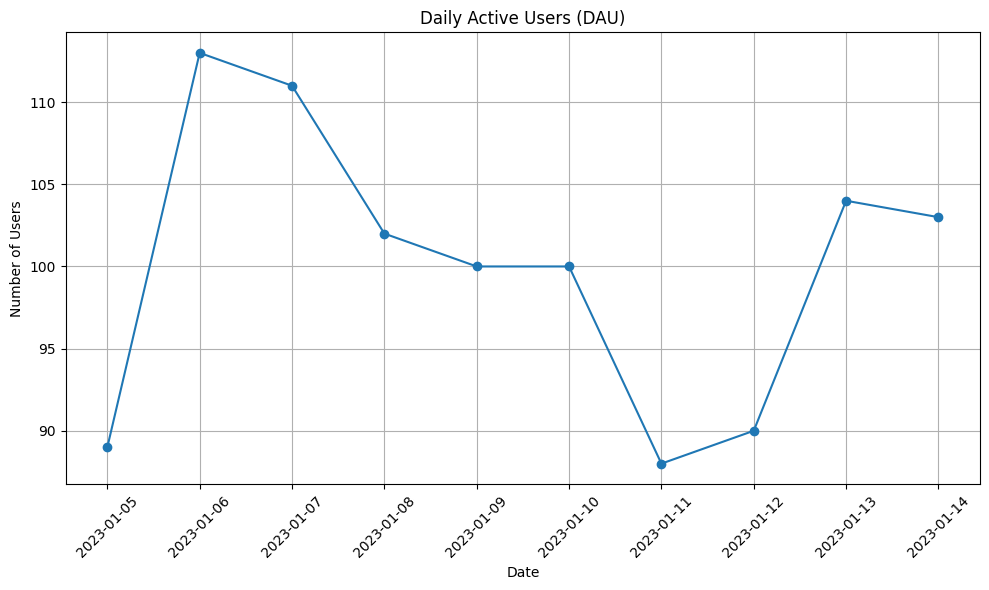

In [51]:
# Daily Active Users (DAU)
plt.figure(figsize=(10, 6))
plt.plot(DAU.index, DAU.values, marker='o', linestyle='-')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


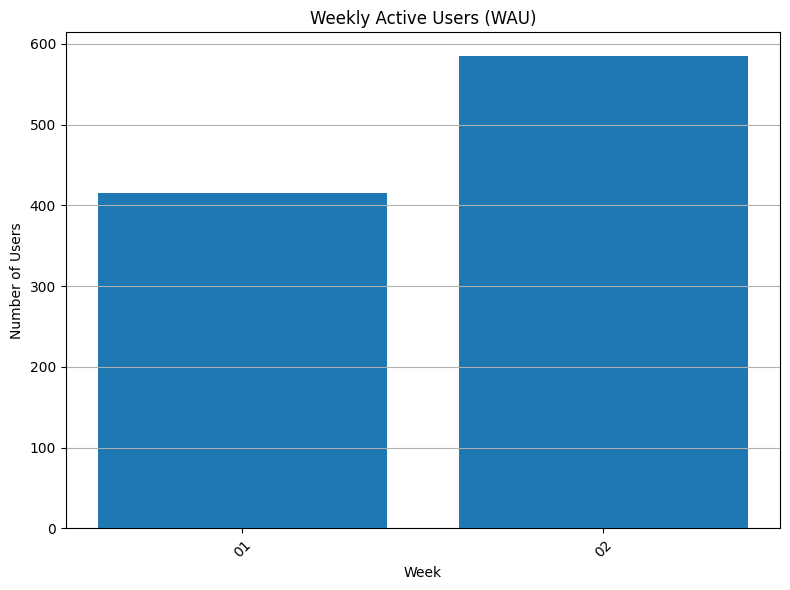

In [52]:
# Weekly Active Users (WAU)
plt.figure(figsize=(8, 6))
plt.bar(WAU.index, WAU.values)
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


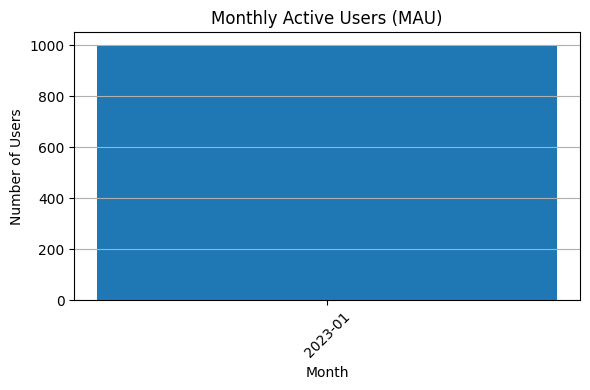

In [53]:
# Monthly Active Users (MAU)
plt.figure(figsize=(6, 4))
plt.bar(MAU.index, MAU.values)
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [54]:
# User retention rates for the first three months after installation
df['month_since_install'] = (df['last_activity_date'] - df['install_date']).dt.days // 30
retention_rate_1_month = df[df['month_since_install'] == 1]['user_id'].nunique() / df['user_id'].nunique()
retention_rate_2_months = df[df['month_since_install'] == 2]['user_id'].nunique() / df['user_id'].nunique()
retention_rate_3_months = df[df['month_since_install'] == 3]['user_id'].nunique() / df['user_id'].nunique()

# Print user retention rates
print("\nUser retention rates for the first three months after installation:")
print("1 Month Retention Rate:", retention_rate_1_month)
print("2 Months Retention Rate:", retention_rate_2_months)
print("3 Months Retention Rate:", retention_rate_3_months)


User retention rates for the first three months after installation:
1 Month Retention Rate: 0.0
2 Months Retention Rate: 0.0
3 Months Retention Rate: 0.0


# **Feature Usage Analysis**

In [55]:
# Calculate total usage of each feature
total_feature1_usage = df['feature1_usage'].sum()
total_feature2_usage = df['feature2_usage'].sum()
total_feature3_usage = df['feature3_usage'].sum()

# Identify the most and least used features
most_used_feature = df[['feature1_usage', 'feature2_usage', 'feature3_usage']].sum().idxmax()
least_used_feature = df[['feature1_usage', 'feature2_usage', 'feature3_usage']].sum().idxmin()


In [56]:

# Print feature usage and insights
print("Total Usage of Features:")
print("Feature 1 Usage:", total_feature1_usage)
print("Feature 2 Usage:", total_feature2_usage)
print("Feature 3 Usage:", total_feature3_usage)
print("\nMost Used Feature:", most_used_feature)
print("Least Used Feature:", least_used_feature)


Total Usage of Features:
Feature 1 Usage: 17131
Feature 2 Usage: 19876
Feature 3 Usage: 19795

Most Used Feature: feature2_usage
Least Used Feature: feature1_usage


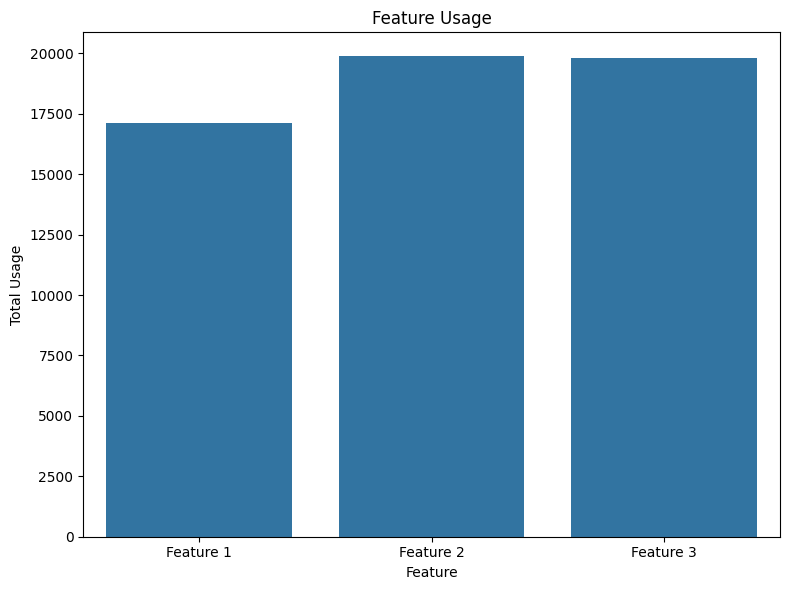

In [57]:
import seaborn as sns

# Feature Usage
plt.figure(figsize=(8, 6))
sns.barplot(x=['Feature 1', 'Feature 2', 'Feature 3'], y=[total_feature1_usage, total_feature2_usage, total_feature3_usage])
plt.title('Feature Usage')
plt.xlabel('Feature')
plt.ylabel('Total Usage')
plt.tight_layout()
plt.show()


# **Conversion Funnel Analysis**

In [58]:
# Calculate conversion rates
install_count = df['user_id'].nunique()
signup_count = df[df['install_date'].notnull()]['user_id'].nunique()  # Using install_date as signup
goal_setting_count = df[df['activity_level'] != 'Low']['user_id'].nunique()  # Using activity_level as goal setting
workout_tracking_count = df[df['feature1_usage'] > 0]['user_id'].nunique()  # Using feature1_usage as workout tracking

signup_conversion_rate = signup_count / install_count
goal_setting_conversion_rate = goal_setting_count / signup_count
workout_tracking_conversion_rate = workout_tracking_count / goal_setting_count




In [59]:
# Print conversion rates
print("Conversion Rates:")
print("Signup Conversion Rate:", signup_conversion_rate)
print("Goal Setting Conversion Rate:", goal_setting_conversion_rate)
print("Workout Tracking Conversion Rate:", workout_tracking_conversion_rate)

Conversion Rates:
Signup Conversion Rate: 1.0
Goal Setting Conversion Rate: 0.667
Workout Tracking Conversion Rate: 1.4992503748125936


In [60]:
# Identify potential bottlenecks
bottlenecks = {
    'Signup': signup_conversion_rate,
    'Goal Setting': goal_setting_conversion_rate,
    'Workout Tracking': workout_tracking_conversion_rate
}

# Print potential bottlenecks
print("\nPotential Bottlenecks:")
for step, rate in bottlenecks.items():
    if rate < 1:
        print(f"{step}: {rate * 100:.2f}% conversion rate")


Potential Bottlenecks:
Goal Setting: 66.70% conversion rate


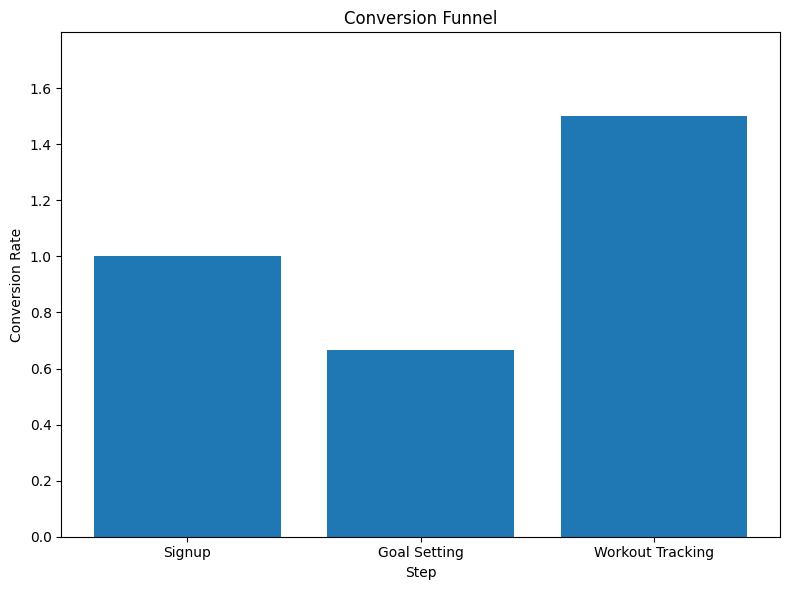

In [61]:
# Conversion Funnel
plt.figure(figsize=(8, 6))
conversion_rates = [signup_conversion_rate, goal_setting_conversion_rate, workout_tracking_conversion_rate]
labels = ['Signup', 'Goal Setting', 'Workout Tracking']
plt.bar(labels, conversion_rates)
plt.title('Conversion Funnel')
plt.xlabel('Step')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1.2 * max(conversion_rates))
plt.tight_layout()
plt.show()


# **User Segmentation Analysis**

In [62]:
# Segment users based on relevant criteria
age_segments = df.groupby(pd.cut(df['age'], bins=[0, 25, 35, 45, float('inf')])).size().reset_index(name='count')
gender_segments = df.groupby('gender').size().reset_index(name='count')
location_segments = df.groupby('location').size().reset_index(name='count')
activity_level_segments = df.groupby('activity_level').size().reset_index(name='count')


In [63]:
# Print user segments and their counts
print("User Segments based on Age:")
print(age_segments)

print("\nUser Segments based on Gender:")
print(gender_segments)

print("\nUser Segments based on Location:")
print(location_segments)

print("\nUser Segments based on Activity Level:")
print(activity_level_segments)

User Segments based on Age:
            age  count
0   (0.0, 25.0]    232
1  (25.0, 35.0]    515
2  (35.0, 45.0]    253
3   (45.0, inf]      0

User Segments based on Gender:
        gender  count
0      Agender     12
1     Bigender     15
2       Female    453
3  Genderfluid     18
4  Genderqueer     17
5         Male    458
6   Non-binary     14
7   Polygender     13

User Segments based on Location:
        location  count
0    Afghanistan      7
1        Albania      9
2         Angola      1
3      Argentina     18
4        Armenia      4
..           ...    ...
122    Venezuela      4
123      Vietnam      7
124        Yemen      4
125       Zambia      1
126     Zimbabwe      2

[127 rows x 2 columns]

User Segments based on Activity Level:
  activity_level  count
0           High    317
1            Low    333
2         Medium    350


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2041: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


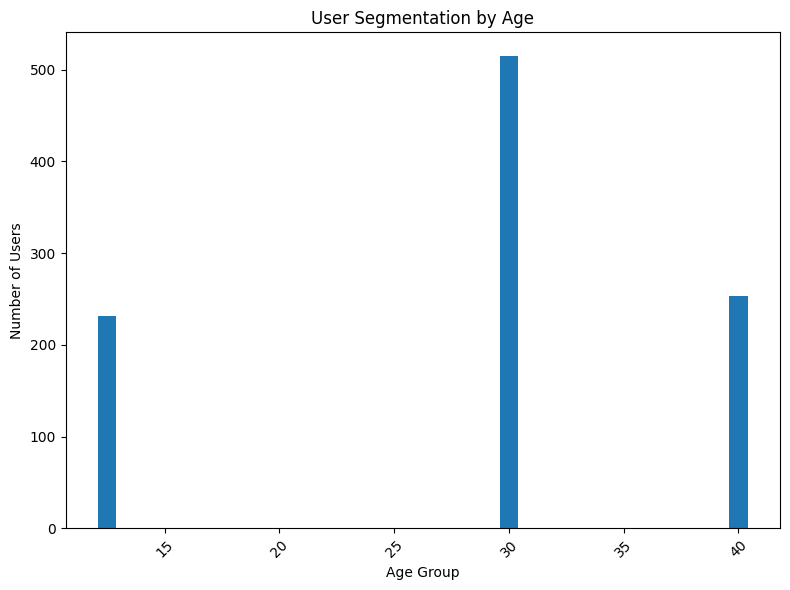

In [64]:
# Extract midpoints of age intervals for plotting
age_midpoints = age_segments['age'].apply(lambda x: x.mid)

# User Segmentation: Age
plt.figure(figsize=(8, 6))
plt.bar(age_midpoints, age_segments['count'])
plt.title('User Segmentation by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


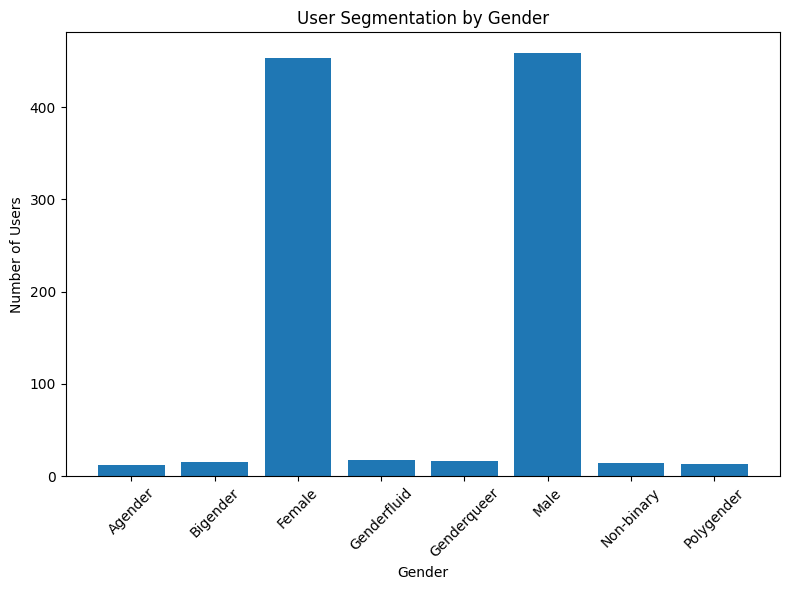

In [65]:
# User Segmentation: Gender
plt.figure(figsize=(8, 6))
plt.bar(gender_segments['gender'], gender_segments['count'])
plt.title('User Segmentation by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


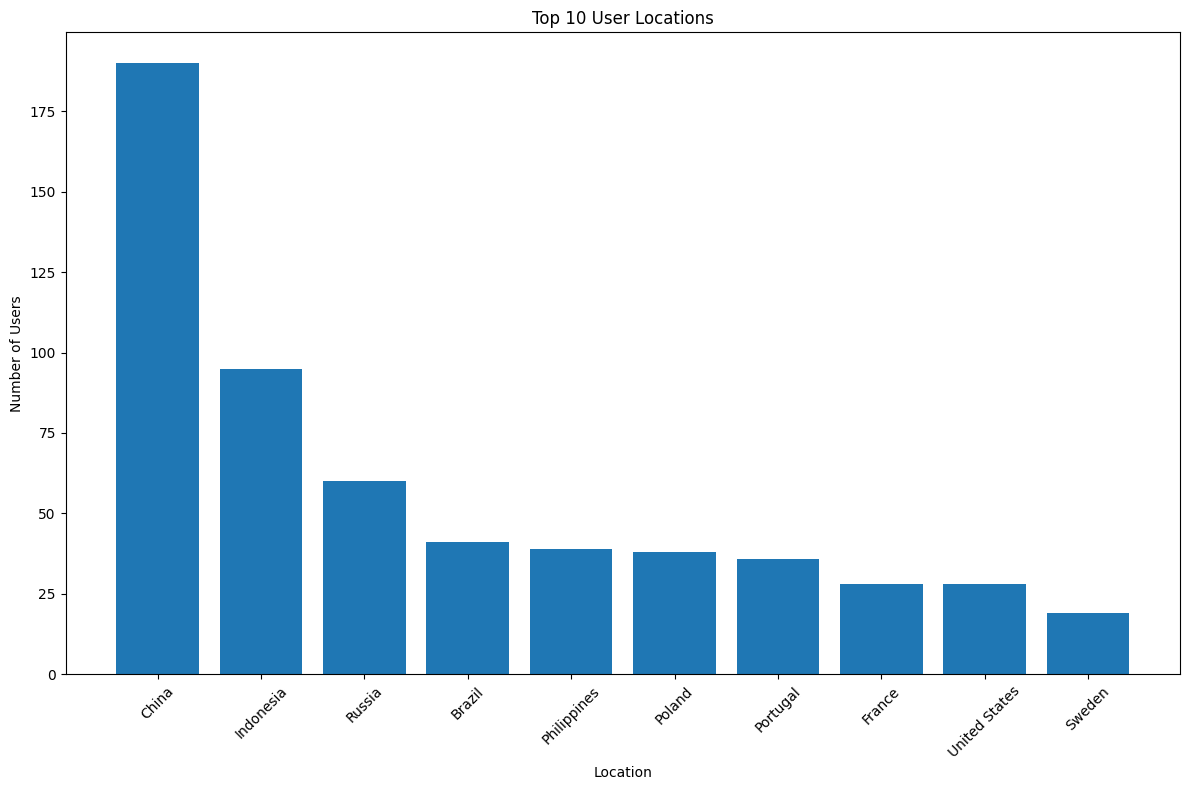

In [66]:
# User Segmentation: Location
plt.figure(figsize=(12, 8))
top_locations = location_segments.nlargest(10, 'count')
plt.bar(top_locations['location'], top_locations['count'])
plt.title('Top 10 User Locations')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


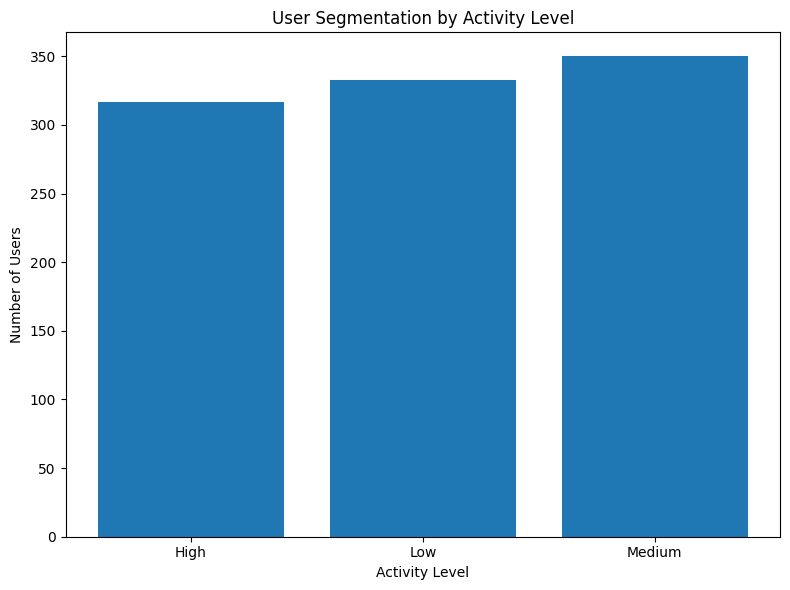

In [67]:
# User Segmentation: Activity Level
plt.figure(figsize=(8, 6))
plt.bar(activity_level_segments['activity_level'], activity_level_segments['count'])
plt.title('User Segmentation by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

# **Recommendations**


1.	Optimize Onboarding Experience:
•	Simplify the goal-setting process to reduce friction and improve conversion rates.
•	Provide personalized recommendations and guided tours to enhance user engagement and retention.
2.	Enhance Feature Adoption:
•	Conduct user surveys and feedback sessions to identify feature preferences and pain points.
•	Implement gamification elements, rewards, and incentives to encourage exploration and usage of less-utilized features.
3.	Implement Targeted Marketing Campaigns:
•	Leverage user segmentation insights to tailor marketing messages and campaigns to specific demographics and user segments.
•	Utilize personalized emails, push notifications, and in-app messages to re-engage inactive users and drive retention.
4.	Invest in Localization and Community Building:
•	Develop localized content, challenges, and events to resonate with users in different geographic regions.
•	Foster a sense of community through user forums, challenges, and social sharing features to enhance user engagement and brand loyalty.
5.	Continuous Monitoring and Iteration:
•	Establish robust analytics and monitoring mechanisms to track user behavior, engagement metrics, and conversion rates.
•	Regularly iterate and optimize app features, content, and user experiences based on data-driven insights and user feedback.
